# Homework 1

## References

+ Lectures 1 through 4 (inclusive).


## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

import numpy as np
import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.

    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

## Student details

+ **First Name: Yichen**
+ **Last Name: Zhang**
+ **Email: yichen55@illinois.edu**
+ **Used generative AI to complete this assignment (Yes/No): No**
+ **Which generative AI tool did you use (if applicable)?:**

## Problem 1

Disclaimer: This example is a modified version of the one found in a 2013 lecture on Bayesian Scientific Computing taught by Prof. Nicholas Zabaras.
I am not sure where the original problem is coming from.

We are tasked with assessing the usefulness of a tuberculosis test.
The prior information I is:

> The percentage of the population infected by tuberculosis is 0.4\%.
We have run several experiments and determined that:
+ If a tested patient has the disease, then 80\% of the time the test comes out positive.
+ If a tested patient does not have the disease, then 90\% of the time the test comes out negative.

To facilitate your analysis, consider the following logical sentences concerning a patient:

> A: The patient is tested and the test is positive.

> B: The patient has tuberculosis.

A. Find the probability that the patient has tuberculosis (before looking at the result of the test), i.e., $p(B|I)$. This is known as the base rate or the prior probability.<br>
**Answer:** $ p(B|I) = 0.4\% $
<br><br><br><br><br><br><br><br><br>


B. Find the probability that the test is positive given that the patient has tuberculosis, i.e., $p(A|B,I)$.<br>
**Answer:** $ p(A|B,I) = 80\% $
<br><br><br><br><br><br><br><br><br>

C. Find the probability that the test is positive given that the patient does not have tuberculosis, i.e., $p(A|\neg B, I)$.<br>
**Answer:** $ p(\neg A|\neg B, I)=90\% $

$p(A|\neg B, I)=1 - p(\neg A|\neg B, I)=1 - 90\% = 10\%$

<br><br><br><br><br><br><br><br><br>


D. Find the probability that a patient that tested positive has tuberculosis, i.e., $p(B|A,I)$.<br>
**Answer:** $p(\neg B|I) = 1 - p(B|I) = 1 - 0.4\% = 99.6\%$

$ p(B|A,I) = \frac{p(A|B,I)p(B|I)}{p(A|I)} = \frac{p(A|B,I)p(B|I)}{p(A|B,I)p(B|I) + p(A| \neg B,I)p(\neg B|I)}  = \frac{80\% \times 0.4\%}{80\% \times 0.4\% + 10\% \times 99.6\%} = 0.0311284 = 3.11\% $
<br><br><br><br><br><br><br><br>

E. Find the probability that a patient that tested negative has tuberculosis, i.e., $p(B|\neg A, I)$. Does the test change our prior state of knowledge about about the patient? Is the test useful?<br>
**Answer:** $p(\neg A|B,I) = 1 - p(A|B,I) = 1 - 80\% = 20\%$

$ p(B|\neg A,I) = \frac{p(\neg A|B,I)p(B|I)}{p(\neg A|I)} = \frac{p(\neg A|B,I)p(B|I)}{p(\neg A|B,I)p(B|I) + p(\neg A| \neg B,I)p(\neg B|I)}  = \frac{20\% \times 0.4\%}{20\% \times 0.4\% + 90\% \times 99.6\%} = 0.0008917 = 0.08917\% $

$ $

Testing alters prior knowledge. Initially, the prior probability P(B) is 0.4%. The test's false positive rate, P(B|¬A) = 0.089%, is very low, indicating that the test is effective. Since 0.089% is significantly smaller than the initial prior estimate of 0.4%, the test provides new information that corrects the original prior estimate, proving its usefulness.  

If the test result is negative, we can be more confident that the patient does not have the disease. This significantly reduces the likelihood of illness, enabling doctors to make better decisions.  

Additionally, from problem D, we know that P(B|A) = 3%, which is much higher than the initial prior estimate of 0.4%. Therefore, if the test result is positive, we can be more confident that the patient has the disease, further demonstrating the usefulness of the test.

<br><br><br><br><br><br><br><br>

F. What would a good test look like? Find values for

$$
p(A|B,I)= p(\text{test is positive} |\text{has tuberculosis},I),
$$

and

$$
p(A| \neg B, I) = p(\text{test is positive}|\text{does not have tuberculosis}, I),
$$

so that

$$
p(B|A, I) = p(\text{has tuberculosis}|\text{test is positive}, I) = 0.99.
$$

There are more than one solutions. How would you pick a good one? Thinking in this way can help you set goals if you work in R\&D. If you have time, try to figure out whether or not there exists such an accurate test for tuberculosis<br>
**Answer:** $ p(B|A,I) = \frac{p(A|B,I)p(B|I)}{p(A|I)} = \frac{p(A|B,I)p(B|I)}{p(A|B,I)p(B|I) + p(A| \neg B,I)p(\neg B|I)} $

Let $ p(B|I) = t $,

$ p(B|A,I) = \frac{p(A|B,I)\cdot t}{p(A|B,I)\cdot t + p(A| \neg B,I)\cdot(1 - t)} = 0.99$

$ p(A|B,I)\cdot t=0.99[p(A|B,I)\cdot t] + 0.99[p(A| \neg B,I)\cdot(1 - t)] $

$ p(A|B,I)\cdot t = 99[p(A| \neg B,I)\cdot(1 - t)] $

$ p(A|B,I) = \frac{99\cdot(1 - t)}{t} p(A| \neg B,I) $

$ $

Let $ t = 0.01 = 1\%$,

$ p(A|B,I) = 9801 p(A| \neg B,I) $

Let $ p(A| \neg B,I) = 0.0001 = 0.01\% $,

$ p(A|B,I) = 0.9801 = 98.01\% $

$  $

P(A|B): Having the disease and testing positive. This represents the accuracy of the test. The higher, the better.  
P(A|¬B): Not having the disease but testing positive. This represents the false positive rate. The lower, the better.  

P(A|B) and P(A|¬B) increase and decrease together in the above formula. We aim to achieve the highest possible test accuracy while keeping the false positive rate as low as possible, ensuring that P(B|A) = 0.99.  

Therefore, achieving P(B|A) = 0.99 is very difficult.  

Possible reasons:  
1. The sampling procedure and the technician's skill affect results, inevitably leading to some errors.  
2. The virus may have a latent period, making it harder to detect.  

How to improve P(B|A) to 0.99?  
1. More precise execution of testing procedures by personnel.  
2. Advancements in cutting-edge research.

<br><br><br><br><br><br><br><br><br>

## Problem 2 - Practice with discrete random variables

Consider the Categorical random variable:

$$
X \sim \operatorname{Categorical}(0.3, 0.1, 0.2, 0.4),
$$

taking values in $\{0,1,2,3\}$. Find the following (you may use ``scipy.stats.rv_discrete`` or do it by hand):

A. The expectation $\mathbb{E}[X]$.

**Answer:** $\mathbb{E}[X] = 0*0.3 + 1*0.1 + 2*0.2 + 3*0.4 = 1.7$
<br><br>

In [ ]:
# You can also answer with code here:

B. The variance $\mathbb{V}[X]$.

**Answer:** $\mathbb{V}[X] = 0.3(0 - \mathbb{E}[X])^2 + 0.1(1 - \mathbb{E}[X])^2 + 0.2(2 - \mathbb{E}[X])^2 + 0.4(3 - \mathbb{E}[X])^2 = 0.867 + 0.049 + 0.018 + 0.676 = 1.61$
<br><br>

In [ ]:
# You can also answer with code here:

C. Plot the probability mass function of $X$.

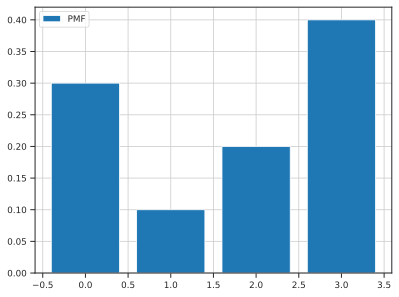

In [7]:
# Your code here. Hint: use a bar plot
prob = [0.3, 0.1, 0.2, 0.4]
x = [0, 1, 2, 3]
plt.bar(x, prob, label = 'PMF')
plt.grid()
plt.legend()

D. Find the probability that $X$ is in $\{0, 2\}$.

**Answer:** $X.pmf(0) + X.pmf(2) = 0.3 + 0.2 = 0.5$
<br><br>

In [14]:
# You can also answer with code here:
X.pmf(0) + X.pmf(2)

0.4741515903154133

E. Find $\mathbb{E}[4X + 3]$.

**Answer:** $\mathbb{E}[4X + 3] = 4\mathbb{E}[X] + 3 = 4 * 1.7 + 3 = 9.8$
<br><br>

In [ ]:
# You can also answer with code here:

F. Find $\mathbb{V}[4X+3]$.

**Answer:** $\mathbb{V}[4X+3] = 4^2\mathbb{V}[X] = 16 * 1.61 = 25.76$
<br><br>

In [ ]:
# You can also answer with code here:

## Problem 3 - Predicting the probability of major earthquakes in Southern California

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

A. The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may are unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of organge and red colors in each decade). We have done this for you.

<ipython-input-8-33698d9d9a34>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best", frameon=False)


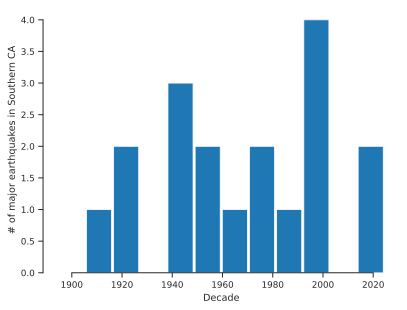

In [8]:
eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019
])
fig, ax = plt.subplots(dpi=150)
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10)
ax.set_xlabel('Decade')
ax.set_ylabel('# of major earthquakes in Southern CA')
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

B. The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a discrete distribution with values $\{0,1,2,\dots\}$ which is commonly used to model the number of events occuring in a certain time period.
It is the right choice when these events are happening independently and the probability of any event happening over a small period of time is constant.
Let's use the Poisson to model the number of earthquakes $X$ occuring in a decade.
We write:

$$
X \sim \operatorname{Poisson}(r),
$$

where $r$ is the *rate parameter* of Poisson.
The rate is the number of events per time period.
Here, $r$ is the number of earthquakes per decade.
Using the data above, we can set the rate as the empirical average of the observed number of earthquakes per decade:

In [9]:
r = np.mean(eq_data)
print('r = {0:1.2f} major earthquakes per decade'.format(r))

r = 1.50 major earthquakes per decade


Strictly speaking, **this is not how you should be calibrating models!!!**
We will learn about the **right** way (which uses Bayes' rule) in the subsequent lectures.
But it will do for now as the answer you would get using the **right** way is, for this problem, almost the same.
Let's define a Poisson distribution using ``scipy.stats.poisson`` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)):

In [10]:
X = st.poisson(r)

A. Plot the probability mass function of ``X``.

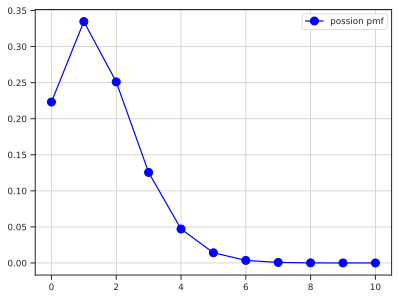

In [11]:
# Your code here
fig, ax = plt.subplots(1,1)
x = np.linspace(0,10,11)
ax.plot(x, X.pmf(x), 'bo-', ms = 8, label = 'possion pmf')
plt.grid()
plt.legend()
plt.show()

B. What is the probability that at least one major earthquake will occur during the next decade?<br>
**Answer:**
<br><br><br><br><br><br><br><br>

In [13]:
# You can also answer with code here:
1 - X.pmf(0)

0.7768698398515702

C. What is the probability that at least one major earthquake will occur during the next two decades?
Hint: Consider two independent and identical copies of $X$, say $X_1$ and $X_2$.
And consider their sum $Y = X_1 + X_2$. Read [this](https://en.wikipedia.org/wiki/Poisson_distribution#Sums_of_Poisson-distributed_random_variables) about the sum of two independent Poisson distributions.
<br>
**Answer:**
<br><br><br><br><br><br><br><br>

In [16]:
# You can also answer with code here:
Y = st.poisson(r + r)
1 - Y.pmf(0)

0.950212931632136

D. What is the probability that at least one major earthquake will occur during the next five decades?<br>
**Answer:**
<br><br><br><br><br><br><br><br>

In [17]:
# You can also answer with code here:
Z = st.poisson(r * 5)
1 - Z.pmf(0)

0.9994469156298522

## Problem 4 - Failure of a mechanical component

Assume that you designing a gear for a mechanical system.
Under normal operating conditions the gear is expected to fail at a random time.
Let $T$ be a random variable capturing the time the gear fails.
What should the probability density of $T$ look like?

Here are some hypothetical data to work with.
Suppose that we took ten gears and we worked them until failure.
The failure times (say in years) are as follows:

In [18]:
time_to_fail_data = np.array(
    [
        10.5,
        7.5,
        8.1,
        8.4,
        11.2,
        9.3,
        8.9,
        12.4
    ]
)

Why does each gear fail at different times?
There are several sources of uncertainty.
The most important are:

- Manufacturing imperfections.
- Different loading conditions.

If this was a controlled fatigue experiment, then we could eliminate the second source of uncertainty by using exactly the same loading conditions.

Now, we are going to fit a probability density function to these data.
Which one should we use?
Well, new gears do not fail easily.
So, the probability density function of $T$ should be close to zero for small $T$.
As time goes by, the probability density should increase because various things start happening to the material, e.g., crack formation, fatigue, etc.
Finally, the probability density must again start going to zero as time further increases because nothing lasts forever...
A probability distribution that is commonly used to model this situation is the [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution).
We are going to fit some fail time data to a Weibull distribution and then you will have to answer a few questions about failing times.

The Weibull has parameters and we are going to fit them to the available data.
The method we are going to use is called the *maximum likelihood method*.
We haven't really talked about this, and it is not important to know what it is to do this homework problem.
We will learn about maximum likelihood in later lectures.
Here is how we fit the parameters using `scipy.stats`:

In [19]:
fitted_params = st.exponweib.fit(time_to_fail_data, loc=0)
T = st.exponweib(*fitted_params)
print(f"Fitted parameters: {fitted_params}")

Fitted parameters: (448.066965711728, 0.7099665338918923, 3.4218808260575804, 0.41627831297126994)


Let's plot the fitted Weibul PDF and the data we used:

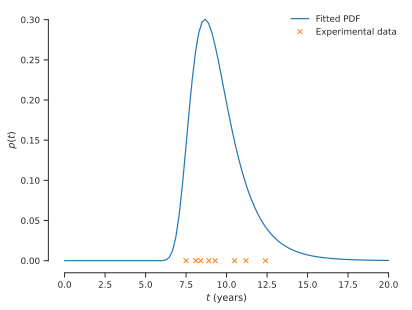

In [20]:
fig, ax = plt.subplots()
ts = np.linspace(0.0, 20.0, 100)
ax.plot(
    ts,
    T.pdf(ts),
    label="Fitted PDF"
)
ax.plot(
    time_to_fail_data,
    np.zeros_like(time_to_fail_data),
    "x",
    label="Experimental data"
)
ax.set_xlabel(r"$t$ (years)")
ax.set_ylabel(r"$p(t)$")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

Now you have to answer a series of questions about the random variable $T$ that we just fitted.

A. Find the mean fail time and its variance.
Hint: Do not integrate anything by hand. Just use the functionality of ``scipy.stats``.

In [22]:
# Your code here
t_mean = scipy.stats.tmean(time_to_fail_data)
t_var = scipy.stats.tvar(time_to_fail_data)
print(f"E[T] = {t_mean:.2f}")
print(f"V[T] = {t_var:.2f}")

E[T] = 9.54
V[T] = 2.84


B. Plot the cumulative distribution function $F(t) = P(T\le t)$ of $T$.

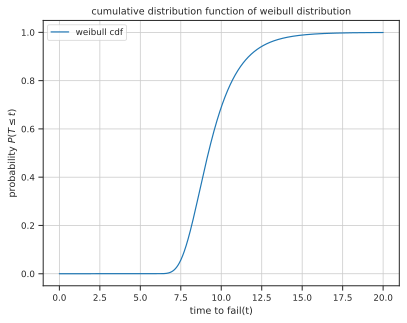

In [23]:
# Your code here
t = np.linspace(0,20,1000)
cdf_value = T.cdf(t)
plt.plot(t, cdf_value, label = 'weibull cdf')
plt.xlabel('time to fail (t)')
plt.ylabel('probability $P(T \leq t)$')
plt.title('cumulative distribution function of weibull distribution')
plt.grid()
plt.legend()
plt.show()

C. Plot the probability that gear survives for more than $t$ as a function of $t$.
That is, plot the function:

$$
S(t) = p(T > t).
$$

Hint: First connect $S(t)$ to the cumulative distribution function $F(t)$ of $T$.

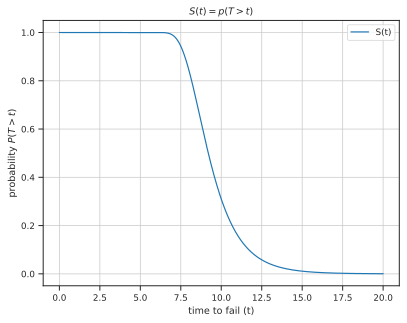

In [24]:
# Your code here
plt.plot(t, 1 - cdf_value, label = 'S(t)')
plt.xlabel('time to fail (t)')
plt.ylabel('probability $P(T > t)$')
plt.title('$S(t) = p(T > t)$')
plt.grid()
plt.legend()
plt.show()

D. Find the probability that the gear lasts anywhere between 8 and 10 years.

In [25]:
# Your code here
T.cdf(10) - T.cdf(8)

0.5342898192604528

E. Find the time $t^*$ such that the probability that the gear fails before $t^*$ is $0.01$.

In [30]:
probability = 0.01
t_star = T.ppf(probability)
print(t_star)

6.975009984185545
